In [169]:
import numpy as np
from dataclasses import dataclass
import random 
n=20

@dataclass
class Parameters:
    insulin_plasma_skeletalmuscle: float
    insulin_skeletalmuscle_plasma: float

    V_skeletalmuscle: float

    fattyacids_plasma_skeletalmuscle: float
    fattyacids_skeletalmuscle_plasma: float

    glucose_plasma_skeletalmuscle: float
    glucose_skeletalmuscle_plasma: float

    aminoacids_plasma_skeletalmuscle: float
    aminoacids_skeletalmuscle_plasma: float



    V_plasma: float


    glucose_to_g6p: float
    g6p_to_glucose: float

    g6p_to_glycogen: float
    glycogen_to_g6p: float
    CLinsulin: float

    g6p_to_pyruvate: float 
    pyruvate_to_g6p: float


    pyruvate_to_acetylcoa: float 
    acetylcoa_to_TCA: float  

    NADH_ETC: float  
    FADH2_ETC: float  

    fattyacids_to_acetylcoa: float  
    aminoacids_to_acetylcoa: float 
    pyruvate_to_lactate: float
    lactate_to_pyruvate: float
    lactate_plasma_skeletalmuscle: float
    lactate_skeletalmuscle_plasma: float
    CLATP:float
    

p = Parameters(
    insulin_plasma_skeletalmuscle=5,         
    insulin_skeletalmuscle_plasma=0.5,            
    V_skeletalmuscle=25.0,                       
    
    fattyacids_plasma_skeletalmuscle=1,         
    fattyacids_skeletalmuscle_plasma=0.1,        

    glucose_plasma_skeletalmuscle=1,            
    glucose_skeletalmuscle_plasma=0.1,            

    aminoacids_plasma_skeletalmuscle=1,
    aminoacids_skeletalmuscle_plasma=0.1,

    V_plasma=5.0,                                


    glucose_to_g6p=1,
    g6p_to_glucose=0.1,


    g6p_to_glycogen=1,
    glycogen_to_g6p=0.6,
    CLinsulin = 1,
    g6p_to_pyruvate=1,
    pyruvate_to_g6p=0.1,

    # Acetyl-CoA & TCA
    pyruvate_to_acetylcoa=1,
    acetylcoa_to_TCA=5,

    # ETC
    NADH_ETC=1,
    FADH2_ETC=1,

    # Alternative fuels
    fattyacids_to_acetylcoa=0.01,
    aminoacids_to_acetylcoa=0.1,

    # Anaerobic respiration
    pyruvate_to_lactate=0.1,
    lactate_to_pyruvate=0.1,
    lactate_plasma_skeletalmuscle=0.1,
    lactate_skeletalmuscle_plasma=1,
    CLATP = 1
)

# 0 glucose plasma
# 1 glucose muscle
# 2 insulin plasma
# 3 insulin muscle
# 4 fattyacids plasma
# 5 fattyacids muscle
# 6 aminoacids plasma
# 7 aminoacids muscle
# 8 g6p muscle
# 9 glycogen muscle
# 10 Pyruvate
# 11 acetylcoa muscle
# 12 NAD 
# 13 NADH
# 14 FAD
# 15 FADH2
# 16 ROS
# 17 ATP
# 18 lactate in plasma
# 19 lactate in muscle


def skeletalmuscle(t,y,p):
    dydt = np.zeros(n)

    dglucose = glucose(t,y,p)
    dinsulin = insulin(t,y,p)
    dfattyacids = fattyacids(t,y,p)
    daminoacids = aminoacids(t,y,p)
    dg6p = g6p(t,y,p)
    dglycogen = glycogen(t,y,p)
    dpyruvate = pyruvate(t,y,p)
    dacetylcoa = acetylcoa(t,y,p)
    dNAD = NAD(t,y,p)
    dNADH = NADH(t,y,p)
    dFAD = FAD(t,y,p)
    dFADH2 = FADH2(t,y,p)
    dROS = ROS(t,y,p)
    dATP = ATP(t,y,p)
    dlactate = lactate(t,y,p)
    
    dydt = dglucose+dinsulin+dfattyacids+daminoacids+dg6p+dglycogen+dpyruvate+dacetylcoa+dNAD+dNADH+dFAD+dFADH2+dROS+dATP+dlactate
    return dydt

def glucose(t, y, p):
    dydt = np.zeros(n)
    dydt[0] = (
        (-p.glucose_plasma_skeletalmuscle * y[0] * p.V_plasma + p.glucose_skeletalmuscle_plasma * y[1] * p.V_skeletalmuscle) / p.V_plasma
    )
    dydt[1] = (
        (p.glucose_plasma_skeletalmuscle * y[0] * p.V_plasma - p.glucose_skeletalmuscle_plasma * y[1] * p.V_skeletalmuscle) / p.V_skeletalmuscle
        -p.glucose_to_g6p * y[1] + p.g6p_to_glucose *y[8]
    )
    return dydt

def insulin(t, y, p):
    dydt = np.zeros(n)
    dydt[2] = ((-p.insulin_plasma_skeletalmuscle * y[2] *p.V_plasma + p.insulin_skeletalmuscle_plasma * y[3] * p.V_skeletalmuscle) / p.V_plasma
               )
    dydt[3] = ((p.insulin_plasma_skeletalmuscle * y[2] *p.V_plasma - p.insulin_skeletalmuscle_plasma * y[3] * p.V_skeletalmuscle) / p.V_skeletalmuscle
               -p.CLinsulin*y[3])
    return dydt

def fattyacids(t, y, p):
    dydt = np.zeros(n)
    dydt[4] = ((-p.fattyacids_plasma_skeletalmuscle * y[4] * p.V_plasma + p.fattyacids_skeletalmuscle_plasma * y[5] * p.V_skeletalmuscle) / p.V_plasma
               )
    dydt[5] = ((p.fattyacids_plasma_skeletalmuscle * y[4] * p.V_plasma - p.fattyacids_skeletalmuscle_plasma * y[5] * p.V_skeletalmuscle) / p.V_skeletalmuscle
               -p.fattyacids_to_acetylcoa * y[5] *y[17])
    return dydt



def aminoacids(t, y, p):
    dydt = np.zeros(n)
    dydt[6] = ((-p.aminoacids_plasma_skeletalmuscle * y[6] * p.V_plasma + p.aminoacids_skeletalmuscle_plasma * y[7] * p.V_skeletalmuscle) / p.V_plasma
               )
    dydt[7] = ((p.aminoacids_plasma_skeletalmuscle * y[6] * p.V_plasma - p.aminoacids_skeletalmuscle_plasma * y[7] * p.V_skeletalmuscle) / p.V_skeletalmuscle
               - p.aminoacids_to_acetylcoa * y[7])
    return dydt

def g6p(t,y,p):
    dydt = np.zeros(n)
    Km= 1
    dydt[8] = (
        p.glucose_to_g6p * y[1] - p.g6p_to_glucose *y[8] -p.g6p_to_glycogen*p.V_skeletalmuscle*y[8]/(Km+y[8]*p.V_skeletalmuscle) +p.glycogen_to_g6p*y[9]
        -p.g6p_to_pyruvate * y[8] * y[12]**2 + p.pyruvate_to_g6p *y[10]**2 * y[17]**3 * y[13]**2 
    )
    return dydt

def glycogen(t,y,p):
    dydt = np.zeros(n)

    #adult weighing 70kg has about 400 g glycogenin muscle
    #1-2% muscle mass
    #20% of volume
    Km= 1
    

    dydt[9] = (
        p.g6p_to_glycogen*p.V_skeletalmuscle*y[8]/(Km+y[8]*p.V_skeletalmuscle) -p.glycogen_to_g6p*y[9]
    )
    return dydt

def pyruvate(t,y,p):
    dydt = np.zeros(n)
    dydt[10] =  (2* p.g6p_to_pyruvate * y[8] * y[12]**2 - 2*p.pyruvate_to_g6p *y[10]**2 * y[17]**3 * y[13]**2  
                - p.pyruvate_to_acetylcoa * y[10] * y[12] 
                - p.pyruvate_to_lactate * y[10] *y[13] + p.lactate_to_pyruvate * y[19] *y[12])
    return dydt

def acetylcoa(t,y,p):
    dydt = np.zeros(n)
    dydt[11] = (p.pyruvate_to_acetylcoa * y[10] * y[12] + 8*p.fattyacids_to_acetylcoa * y[5] *y[17] + p.aminoacids_to_acetylcoa * y[7]
                - p.acetylcoa_to_TCA * y[11] * y[12]**3 * y[14])
    return dydt

def NAD(t,y,p):
    dydt = np.zeros(n)
    dydt[12] = (-2* p.g6p_to_pyruvate * y[8] * y[12]**2 + 2*p.pyruvate_to_g6p *y[10]**2 * y[17]**3 * y[13]**2 
               - p.pyruvate_to_acetylcoa * y[10] * y[12] 
               - 3*p.acetylcoa_to_TCA * y[11] * y[12]**3 * y[14]
               + 2*p.NADH_ETC*y[13]**2
                + p.pyruvate_to_lactate * y[10] *y[13] - p.lactate_to_pyruvate * y[19] *y[12])
    return dydt

def NADH(t,y,p):
    dydt = np.zeros(n)
    dydt[13] = (2* p.g6p_to_pyruvate * y[8] * y[12]**2 - 2*p.pyruvate_to_g6p *y[10]**2 * y[17]**3 * y[13]**2 
               + p.pyruvate_to_acetylcoa * y[10] * y[12] 
               + 3*p.acetylcoa_to_TCA * y[11] * y[12]**3 * y[14]
               - 2*p.NADH_ETC*y[13]**2
                - p.pyruvate_to_lactate * y[10] *y[13] + p.lactate_to_pyruvate * y[19] *y[12])
    return dydt

def FAD(t,y,p):
    dydt = np.zeros(n)
    dydt[14] = (-p.acetylcoa_to_TCA * y[11] * y[12]**3 * y[14]
                + 2*p.FADH2_ETC*y[15]**2)
    return dydt

def FADH2(t,y,p):
    dydt = np.zeros(n)
    dydt[15] = (p.acetylcoa_to_TCA * y[11] * y[12]**3 * y[14]
                - 2*p.FADH2_ETC*y[15]**2)
    return dydt

def ROS(t,y,p):
    #might include a randomness aspect here. not sure what the probability will be
    probability = 0.05
    dydt = np.zeros(n)

    if probability>random.random():
        dydt[16] = (p.acetylcoa_to_TCA * y[11] * y[12]**3 * y[14]
                    +p.FADH2_ETC*y[15]**2
                    +p.NADH_ETC*y[13]**2
                    +p.fattyacids_to_acetylcoa * y[5] *y[17] + p.aminoacids_to_acetylcoa * y[7])

    return dydt

def ATP(t,y,p):
  
    dydt = np.zeros(n)
    dydt[17] = (-p.glucose_to_g6p * y[2] * y[17] + p.g6p_to_glucose *y[8]
                + 3* p.g6p_to_pyruvate * y[8] * y[12]**2 - 3*p.pyruvate_to_g6p *y[10]**2 * y[17]**3 * y[13]**2
                + p.acetylcoa_to_TCA * y[11] * y[12]**3 * y[14]
                + 3* p.FADH2_ETC*y[15]**2
                + 5* p.NADH_ETC*y[13]**2
                - p.fattyacids_to_acetylcoa * y[5] *y[17]
                - p.CLATP*y[17])
    return dydt

def lactate(t, y, p):
    dydt = np.zeros(n)
    dydt[18] = ((-p.lactate_plasma_skeletalmuscle * y[18] * p.V_plasma + p.lactate_skeletalmuscle_plasma * y[19] * p.V_skeletalmuscle) / p.V_plasma
               )
    dydt[19] = ((p.lactate_plasma_skeletalmuscle * y[18] * p.V_plasma - p.lactate_skeletalmuscle_plasma * y[19] * p.V_skeletalmuscle) / p.V_skeletalmuscle
               + p.pyruvate_to_lactate * y[10] *y[13] - p.lactate_to_pyruvate * y[19] *y[12])
    return dydt

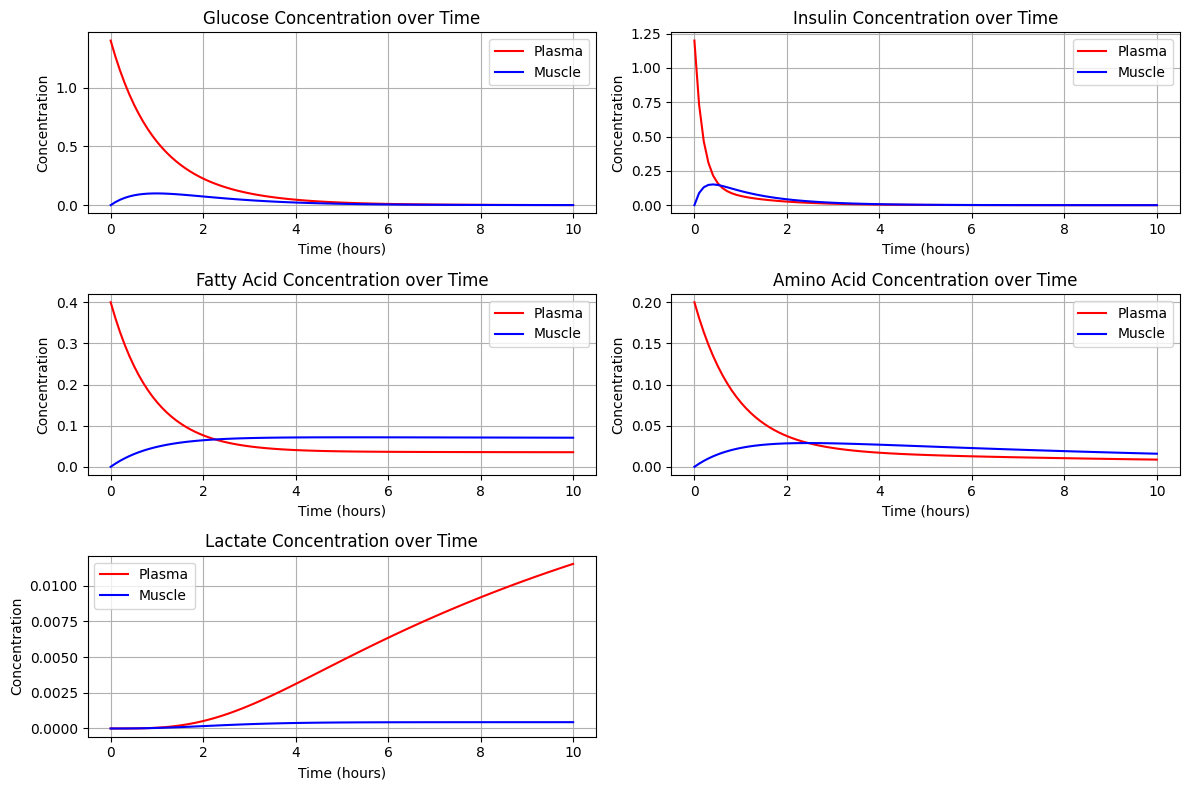

In [170]:
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


y0 = np.zeros(n)
y0[0] = 1.4 #g/L
y0[2] = 1.2
y0[4] = 0.4 #mmol/L
y0[6] = 0.2 #mmol/L

#https://link.springer.com/article/10.1007/s40279-022-01772-2
#average weight of person is around 60 kg,
# skeletal muscle is around 40% of weight
# NAD and NADH concentrations estimated to be around 1.6 mmol/kg and 0.15 mmol/kg muscle weight
#
# volume of skeletal muscle is ~25.0L
y0[12] = 1.6*(60*.4)/25 #mmol/L 
y0[13] = 0.15*(60*.4)/25 #mmol/L

#no certain data for FAD and FADH2, but assume its around 1/3 of NAD
y0[14] = 1.6*(60*.4)/25/3
y0[15] = 0.15*(60*.4)/25/3





t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 100)


solution = solve_ivp(fun=lambda t, y: skeletalmuscle(t, y, p),
                     t_span=t_span,
                     y0=y0,
                     t_eval=t_eval,
                     method='LSODA')

time_hours = solution.t   
glucoseplasma = solution.y[0]
glucosemuscle = solution.y[1]
glycogen = solution.y[9]

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
plt.plot(time_hours, glucoseplasma, label='Plasma', color='red')
plt.plot(time_hours, glucosemuscle, label='Muscle', color='blue')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration')
plt.title('Glucose Concentration over Time')
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 2)
plt.plot(time_hours, solution.y[2], label='Plasma', color='red')
plt.plot(time_hours, solution.y[3], label='Muscle', color='blue')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration')
plt.title('Insulin Concentration over Time')
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 3)
plt.plot(time_hours, solution.y[4], label='Plasma', color='red')
plt.plot(time_hours, solution.y[5], label='Muscle', color='blue')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration')
plt.title('Fatty Acid Concentration over Time')
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 4)
plt.plot(time_hours, solution.y[6], label='Plasma', color='red')
plt.plot(time_hours, solution.y[7], label='Muscle', color='blue')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration')
plt.title('Amino Acid Concentration over Time')
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 5)
plt.plot(time_hours, solution.y[18], label='Plasma', color='red')
plt.plot(time_hours, solution.y[19], label='Muscle', color='blue')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration')
plt.title('Lactate Concentration over Time')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

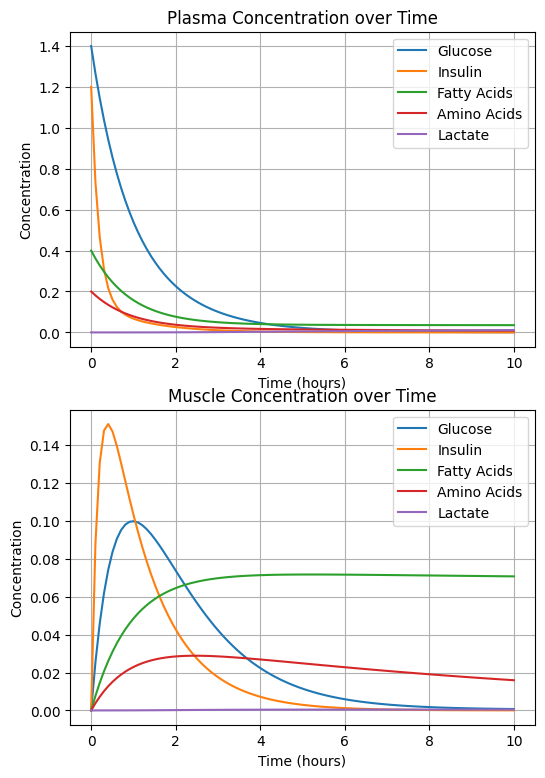

In [175]:
plt.figure(figsize=(6, 9))
plt.subplot(2, 1, 1)
plt.plot(time_hours, solution.y[0], label='Glucose')
plt.plot(time_hours, solution.y[2], label='Insulin')
plt.plot(time_hours, solution.y[4], label='Fatty Acids')
plt.plot(time_hours, solution.y[6], label='Amino Acids')
plt.plot(time_hours, solution.y[18], label='Lactate')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration')
plt.title('Plasma Concentration over Time')
plt.legend()
plt.grid(True)
plt.subplot(2, 1, 2)
plt.plot(time_hours, solution.y[1], label='Glucose')
plt.plot(time_hours, solution.y[3], label='Insulin')
plt.plot(time_hours, solution.y[5], label='Fatty Acids')
plt.plot(time_hours, solution.y[7], label='Amino Acids')
plt.plot(time_hours, solution.y[19], label='Lactate')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration')
plt.title('Muscle Concentration over Time')
plt.legend()
plt.grid(True)

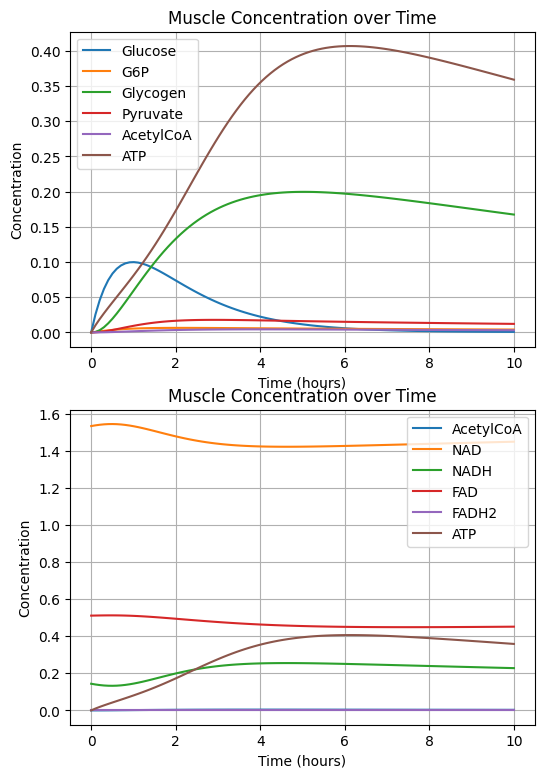

In [174]:
plt.figure(figsize=(6, 9))
plt.subplot(2, 1, 1)
plt.plot(time_hours, solution.y[1], label='Glucose')
plt.plot(time_hours, solution.y[8], label='G6P')
plt.plot(time_hours, solution.y[9], label='Glycogen')
plt.plot(time_hours, solution.y[10], label='Pyruvate')
plt.plot(time_hours, solution.y[11], label='AcetylCoA')
plt.plot(time_hours, solution.y[17], label='ATP')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration')
plt.title('Muscle Concentration over Time')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(time_hours, solution.y[11], label='AcetylCoA')
plt.plot(time_hours, solution.y[12], label='NAD')
plt.plot(time_hours, solution.y[13], label='NADH')
plt.plot(time_hours, solution.y[14], label='FAD')
plt.plot(time_hours, solution.y[16], label='FADH2')
plt.plot(time_hours, solution.y[17], label='ATP')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration')
plt.title('Muscle Concentration over Time')
plt.legend()
plt.grid(True)

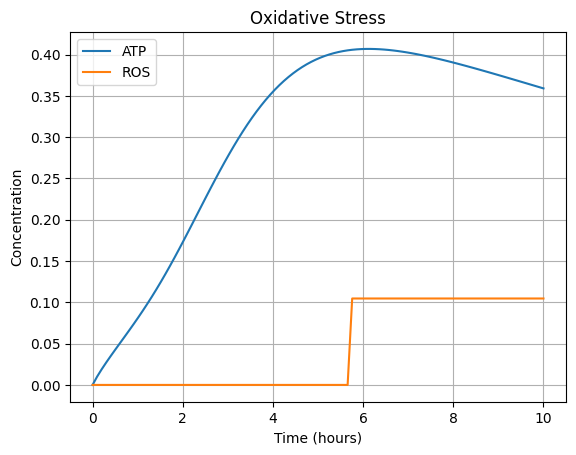

In [173]:



ROSconc = []
probability = 0.05
cumulative_ros = 0 
for i in range(len(solution.y[16])):
    

    if probability>random.random():
        spike = (p.acetylcoa_to_TCA * solution.y[11][i] * solution.y[12][i]**3 * solution.y[14][i]
                    +p.FADH2_ETC*solution.y[15][i]**2
                    +p.NADH_ETC*solution.y[13][i]**2
                    +p.fattyacids_to_acetylcoa * solution.y[5][i] *solution.y[17][i] + p.aminoacids_to_acetylcoa * solution.y[7][i])
    else:
        spike =0
    cumulative_ros+=spike
    ROSconc.append(cumulative_ros)


plt.plot(time_hours, solution.y[17], label='ATP')
plt.plot(time_hours, ROSconc, label='ROS')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration')
plt.title('Oxidative Stress')
plt.legend()
plt.grid(True)